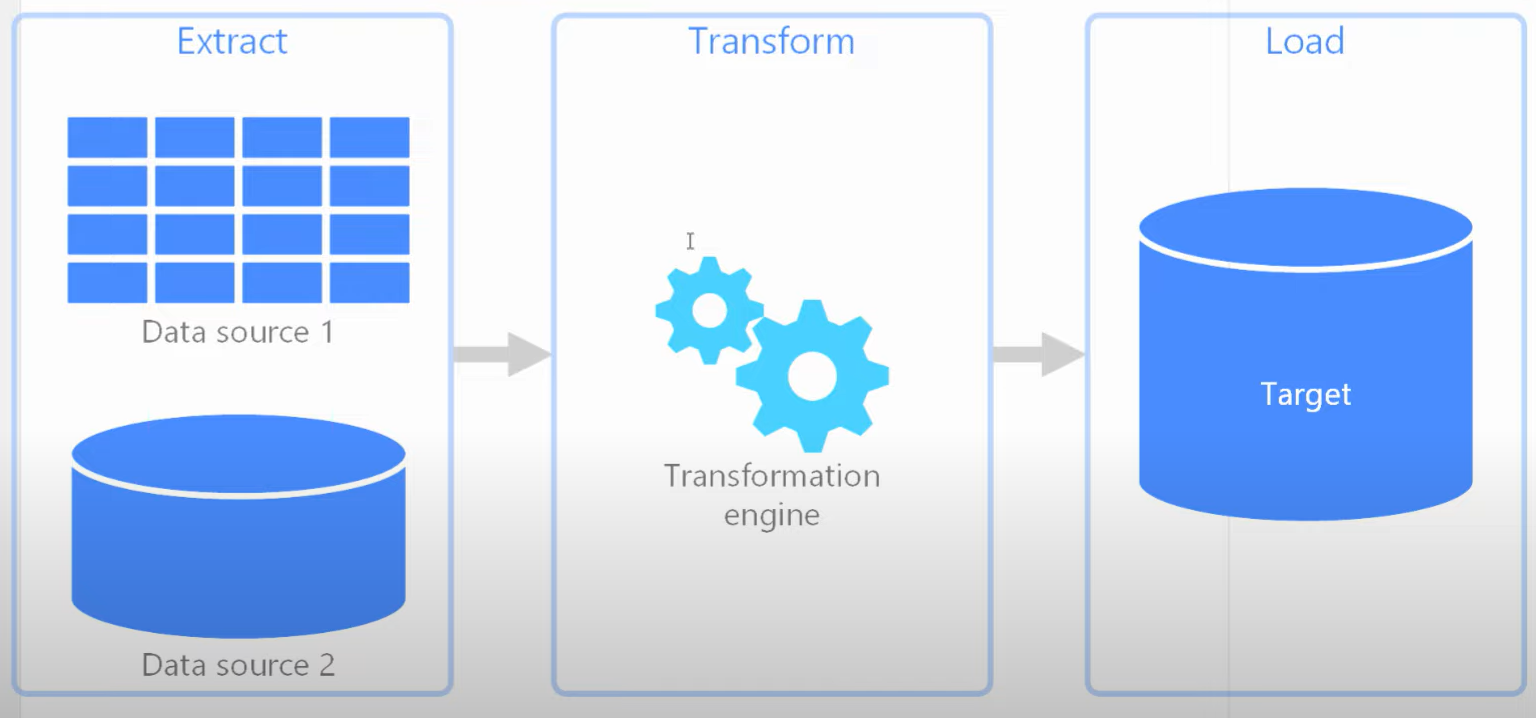

### From .csv to store it in SSMS (Microsoft SQL Server Management Studio) .sql database

In [ ]:
import pandas as pd
import sqlalchemy as sa

In [4]:
df = pd.read_csv('Breast_Cancer.csv',sep=';')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1.0,60.0,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5.0,62.0,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7.0,75.0,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1.0,84.0,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1.0,50.0,Alive


In [ ]:
engine = sa.create_engine('mssql+pyodbc://LAPTOP-E9N1N3UU\\MSSQLSERVER01/ETL_tutorial?driver=SQL+Server+Native+Client+11.0')

# Jadi formatnya itu:
# engine = sa.create_engine('mssql+pyodbc://nama server/nama database?driver=nama drivernya')

In [11]:
df.to_sql(name="Breast_Cancer",con=engine,index=False, if_exists='fail')

94

### Pull data from API to using Python

In [13]:
import requests
import pandas as pd 
import sqlalchemy as sa

In [16]:
url = 'http://api.coincap.io/v2/assets'
headers = {"Content-Type": "application/json",
          "Accept-Encoding": "deflate"}

In [18]:
response = requests.get(url=url,headers=headers)
responseData = response.json()
responseData

{'data': [{'id': 'bitcoin',
   'rank': '1',
   'symbol': 'BTC',
   'name': 'Bitcoin',
   'supply': '19788062.0000000000000000',
   'maxSupply': '21000000.0000000000000000',
   'marketCapUsd': '1856132553962.9492089055599384',
   'volumeUsd24Hr': '24171777354.9432830659640058',
   'priceUsd': '93800.6235255857399732',
   'changePercent24Hr': '1.5491756617920539',
   'vwap24Hr': '92549.9843790071368323',
   'explorer': 'https://blockchain.info/'},
  {'id': 'ethereum',
   'rank': '2',
   'symbol': 'ETH',
   'name': 'Ethereum',
   'supply': '120435390.5403873000000000',
   'maxSupply': None,
   'marketCapUsd': '416433106464.8301300076296489',
   'volumeUsd24Hr': '14158722861.7077804933336634',
   'priceUsd': '3457.7303614520329602',
   'changePercent24Hr': '4.2074700557863281',
   'vwap24Hr': '3345.2816591888534873',
   'explorer': 'https://etherscan.io/'},
  {'id': 'tether',
   'rank': '3',
   'symbol': 'USDT',
   'name': 'Tether',
   'supply': '132672505105.0545000000000000',
   'maxSupp

In [ ]:
df = pd.json_normalize(responseData,record_path='data')
df

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
0,bitcoin,1,BTC,Bitcoin,19788062.0000000000000000,21000000.0000000000000000,1856132553962.9492089055599384,24171777354.9432830659640058,93800.6235255857399732,1.5491756617920539,92549.9843790071368323,https://blockchain.info/
1,ethereum,2,ETH,Ethereum,120435390.5403873000000000,None,416433106464.8301300076296489,14158722861.7077804933336634,3457.7303614520329602,4.2074700557863281,3345.2816591888534873,https://etherscan.io/
2,tether,3,USDT,Tether,132672505105.0545000000000000,None,132692566700.9020551762091157,47368029809.6604410350578640,1.0001512114045911,0.0400855018169589,0.9999282401843941,https://www.omniexplorer.info/asset/31
3,solana,4,SOL,Solana,474814958.4415815000000000,None,112035692988.9426067293819872,1736329910.1287165514440752,235.9565363245118438,3.8741909044121206,229.5996607565739094,https://explorer.solana.com/
4,binance-coin,5,BNB,BNB,166801148.0000000000000000,166801148.0000000000000000,104190527553.0973586648748556,637001281.3974847721399092,624.6391514829223997,0.6513524206256898,615.8240182021069299,https://etherscan.io/token/0xB8c77482e45F1F44d...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,celo,96,CELO,Celo,553833395.0000000000000000,1000000000.0000000000000000,470256753.7147393838786475,23881885.9739271893778273,0.8490942546264105,5.4891190770235219,0.8237300347348637,https://explorer.celo.org/blocks
96,0x,97,ZRX,0x Protocol,848396562.8973439000000000,1000000000.0000000000000000,461784552.4804448204028632,84063674.3092050059435240,0.5443027148806599,3.7410328814613494,0.5478311043941998,https://etherscan.io/token/ZRX
97,reserve-rights,98,RSR,Reserve Rights,53109794708.0000000000000000,100000000000.0000000000000000,456261269.2793795384692548,10742868.6707199592375452,0.0085909062873981,9.0763430832667820,0.0081215771398143,https://etherscan.io/token/0x8762db106b2c2a0bc...
98,trust-wallet-token,99,TWT,Trust Wallet Token,416649900.0000000000000000,None,455878884.3217100488297500,6088933.5169034200302055,1.0941533511029525,7.3048635884042292,1.0466198891238908,https://explorer.binance.org/asset/TWT-8C2


In [22]:
df.isnull().sum()

id                    0
rank                  0
symbol                0
name                  0
supply                0
maxSupply            63
marketCapUsd          0
volumeUsd24Hr         0
priceUsd              0
changePercent24Hr     0
vwap24Hr              0
explorer              1
dtype: int64

Ini masih ada NULL, tapi karena ini masih simple banget jadi gausah diapa-apain langsung di load aja ke SSMS

In [21]:
engine = sa.create_engine('mssql+pyodbc://LAPTOP-E9N1N3UU\\MSSQLSERVER01/ETL_tutorial?driver=SQL+Server+Native+Client+11.0')
df.to_sql(name="DigitalCurrency",con=engine,index=False, if_exists='fail')

100

Cek di SSMS nya udah ada file nya atau belum

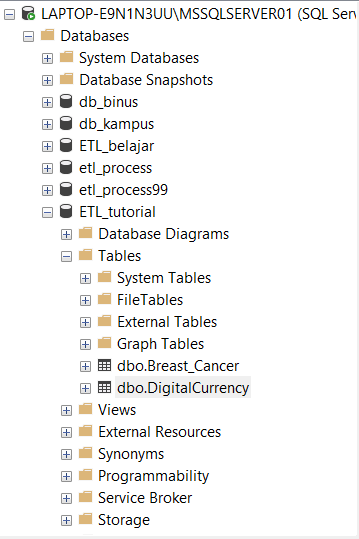

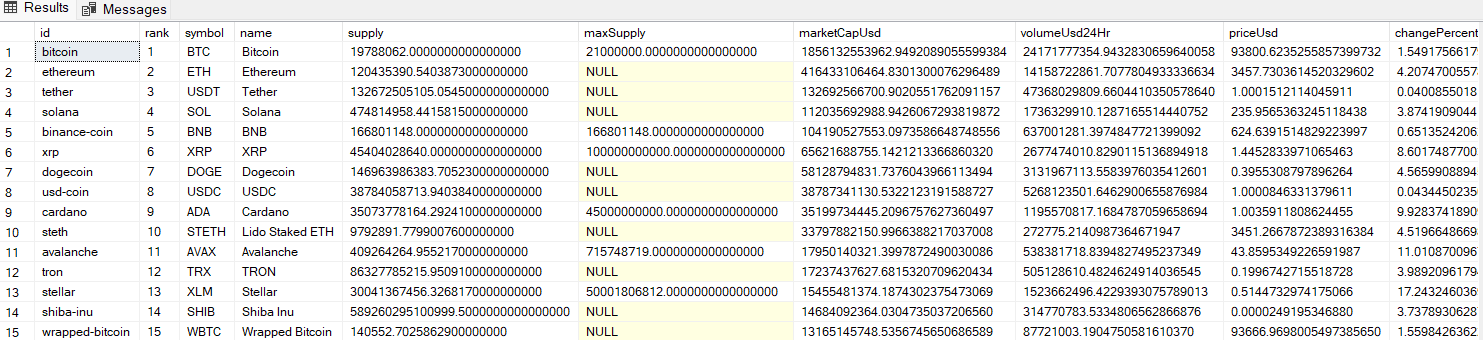

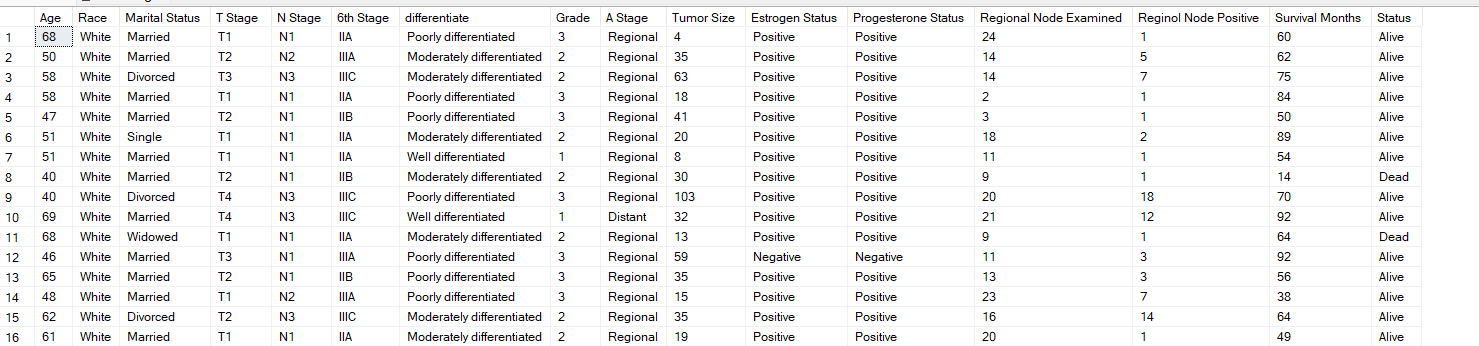

Udah ada tabelnya dan bisa di run